# Install torchmin
Installing torchmin with
```
pip install pytorch-minimize
```
Documentation for [torchmin](https://pytorch-minimize.readthedocs.io/en/latest/index.html)

# Using torchmin for constrained optimization
```
minimize_constr(f, x0[, constr, bounds, …])
```



`xtol` termination condition is satisfied.
Number of iterations: 63, function evaluations: 22, CG iterations: 19, optimality: 1.45e-08, constraint violation: 0.00e+00, execution time: 0.61 s.
tensor([1.3107e-13, 1.0000e+00]) tensor(1.3107e-13)


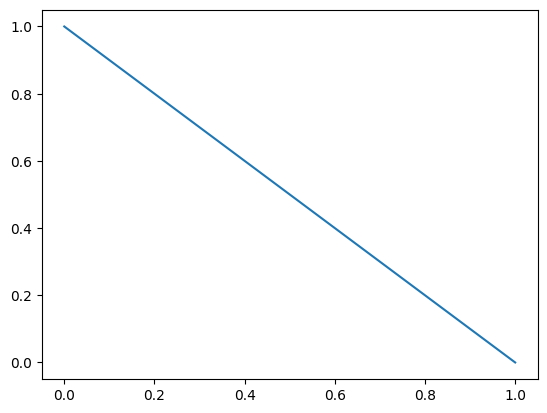

In [3]:
import torch
import numpy as np
import matplotlib.pylab as plt
from torchmin import minimize_constr

def loss_function(p):
    return p[0]*p[1]

torch.manual_seed(382)
pars0 = torch.randn(2)
pars = torch.nn.Parameter(pars0, requires_grad=True)
constr = dict(fun=lambda x: torch.linalg.norm(x, 1), lb=1, ub=1)
bounds = dict(lb=0,ub=1)
res=minimize_constr(loss_function,pars,
                    constr=constr,bounds=bounds,
                    tol=1e-9,disp=1)
print(res.x, res.fun)

plt.plot(np.linspace(0,1), np.ones(50)-np.linspace(0,1))
plt.show()
